## Задача 1
Сгенерируйте $M = 100$ выборок $X_1, \dots, X_{1000}$ из равномерного распределения на отрезке $[0, \theta]$ (возьмите три произвольных положительных значения $\theta$). Для каждой выборки $X_1, \dots, X_n$ для всех $n \leqslant 1000$ посчитайте оценки параметра $\theta$ тайте для всех из полученых теоретической оценок задачи: $2\overline{X}$, $(n + 1)X_{(1)}$, $X_{(1)} + X_{(n)}$, $\frac{n+1}{n}X_{(n)}$. Посчитайте для полученных оценок $\hat{\theta}$ квадратичную функцию потерь $(\hat{\theta} - \theta)^2$ и для каждого фиксированного $n$ усредните по выборкам. Для каждого из трех значений $\theta$ постройте графики усредненных функций потерь в зависимости от $n$.

In [104]:
%matplotlib inline 
import scipy.stats as st
from matplotlib import pyplot as plt 
import math
import numpy as np
import itertools
import operator
M = 100
N = 1000

In [128]:
fig_count = 0
def estimate(theta, num_fig):
    #x = st.uniform(loc=0, scale=theta).rvs(size=N)
    X1 = []
    X2 = []
    X3 = []
    X4 = []
    x = list([st.uniform(loc=0, scale=theta).rvs(size=N) for i in range(M)])
    
    for i in range(M):
        sum_x = 0
        min_x = theta + 1
        max_x = -1
        X1.append([])
        X2.append([])
        X3.append([])
        X4.append([])
        for n in range(1, N + 1):
            sum_x += x[i][n - 1]
            min_x = min(min_x, x[i][ n - 1])
            max_x = max(max_x, x[i][n - 1])
            X1[i].append(2 * sum_x / n)
            X2[i].append((n + 1) * min_x)
            X3[i].append(min_x + max_x)
            X4[i].append((n + 1) * max_x / n)
            
    error_X1 = []
    error_X2 = []
    error_X3 = []
    error_X4 = []
    for n in range(N):
        sum1 = 0
        sum2 = 0
        sum3 = 0
        sum4 = 0
        for i in range(M):
            sum1 += (X1[i][n] - theta) ** 2
            sum2 += (X2[i][n] - theta) ** 2
            sum3 += (X3[i][n] - theta) ** 2
            sum4 += (X4[i][n] - theta) ** 2
        error_X1.append(sum1 / n)
        error_X2.append(sum2 / n)
        error_X3.append(sum3 / n)
        error_X4.append(sum4 / n)
        
    plt.figure(num_fig)
    plt.plot(error_X1)
    plt.plot(error_X2)
    plt.plot(error_X3)
    plt.plot(error_X4)
    plt.title("error")
    plt.legend(["error_X1", "error_X2", "error_X3", "error_X4"])
    plt.ylim(0, 2000)
    
    
    


/Users/ekaterina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/Users/ekaterina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars
/Users/ekaterina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars
/Users/ekaterina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in double_scalars


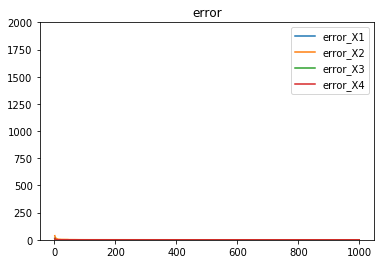

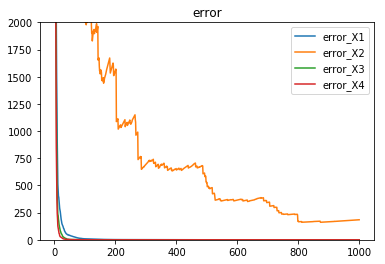

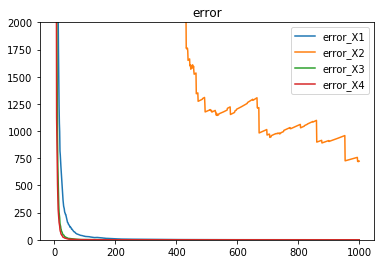

In [129]:
estimate(1, 1)
estimate(50, 2)
estimate(100, 3)

## Вывод

Видим, что у нас ошибка для X_2 падает не очень хорошо при $\theta = 50$ и $\theta = 100$ нежели при $\theta = 1$

## Задача 3
Рассмотрим $X_1, \dots, X_n \sim Bern(\theta)$. По сетке значений $\theta \in [0,1]$ с шагом $0.01$ постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. Какой можно сделать вывод (напишите в комментариях)? Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n = 1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (параметрический бутстреп, количество бутстрепных выборок равно $500$) этой эффективной оценки $\theta$. Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

In [134]:
%matplotlib inline 
import scipy.stats as st
from matplotlib import pyplot as plt 
import math
import numpy as np
import itertools
n = 1000
K = 500

Text(0.5,1,'Rao-Kramer estimation')

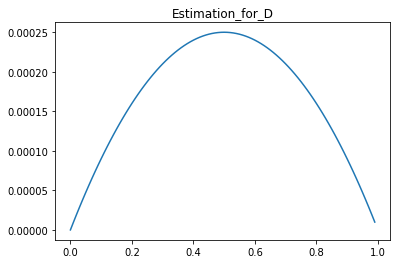

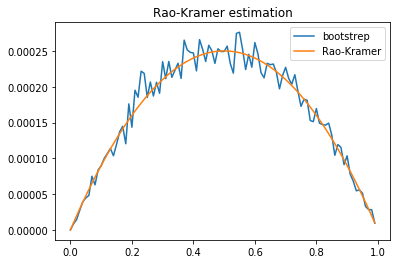

In [159]:
theta = np.arange(0, 1, 0.01)
estimate_D = list([i * (1 - i) / n for i in x])

plt.figure(1)
plt.plot(theta, estimate_D)
plt.title("Estimation_for_D")

bootstrep = []
for current_theta in theta:
    _bin = np.random.binomial(1, current_theta, size=n)
    _sum = list(itertools.accumulate(_bin))[-1]
    avg = _sum / n
    D = 0
    D1 = 0
    for k in range(K):
        bin_param = np.random.binomial(1, avg, size=n)
        _sum = list(itertools.accumulate(bin_param))[-1]
        current_avg = _sum / n
        D += current_avg
        D1 += current_avg ** 2
    bootstrep.append(D1 / K - (D / K) ** 2)
plt.figure(2)
plt.plot(theta, bootstrep)
plt.plot(theta, estimate_D)
plt.legend(["bootstrep", "Rao-Kramer"])
plt.title("Rao-Kramer estimation")


## Вывод
Как видно из графика зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от  $\theta$, можно сделать вывод, что нижняя оценка дисперсии имеет в некоторой точке максимум. Понятно, что трудно выбрать значение, которое будет близко к центру при нашей оценке, потому что имеется довольно большой разброс. Но при увеличении размера выборки дисперсия будет падать, поэтому оценка будет более точной.
